In [0]:
import os
from os.path import join
from os import listdir, rmdir
import zipfile
import requests
import io
from io import StringIO, BytesIO
import glob
from shutil import move
import random

In [0]:
def download_images(url):
  if(os.path.isdir("tiny-imagenet-200")):
    print("Images already downloaded...")
    return
  r = requests.get(url, stream=True)
  print("Downloading "+url)
  zip_ref = zipfile.ZipFile(BytesIO(r.content))
  zip_ref.extractall("./")
  zip_ref.close()

In [3]:
download_images("http://cs231n.stanford.edu/tiny-imagenet-200.zip")

In [0]:
import io
import glob
import os
from shutil import move
from os.path import join
from os import listdir, rmdir

target_folder = './tiny-imagenet-200/val/'
dest_folder   = './tiny-imagenet-200/train/'

val_dict = {}
with open('./tiny-imagenet-200/val/val_annotations.txt', 'r') as f:
    for line in f.readlines():
        split_line = line.split('\t')
        val_dict[split_line[0]] = split_line[1]
        
paths = glob.glob('./tiny-imagenet-200/val/images/*')        
        
for path in paths:
    file = path.split('/')[-1]
    folder = val_dict[file]
    dest = dest_folder + str(folder) + '/images/' + str(file)
    move(path, dest)
    
rmdir('./tiny-imagenet-200/val/images')

In [0]:
target_folder = './tiny-imagenet-200/train/'
train_folder = './tiny-imagenet-200/train_set/'
test_folder = './tiny-imagenet-200/test_set/'

os.mkdir(train_folder)
os.mkdir(test_folder)

paths = glob.glob('./tiny-imagenet-200/train/*')

for path in paths:
    folder = path.split('/')[-1].split('\\')[-1]
    source = target_folder+str(folder+'/images/')
    train_dest = train_folder+str(folder+'/')
    test_dest = test_folder+str(folder+'/')
    os.mkdir(train_dest)
    os.mkdir(test_dest)
    images = glob.glob(source+str('*'))
    
    #making random
    random.shuffle(images)
    
    test_imgs = images[:165].copy()
    train_imgs = images[165:].copy()
    
    #moving 30% for validation
    for image in test_imgs:
        file = image.split('/')[-1].split('\\')[-1]
        dest = test_dest+str(file)
        move(image, dest)
        
    #moving 70% for training
    for image in train_imgs:
        file = image.split('/')[-1].split('\\')[-1]
        dest = train_dest+str(file)
        move(image, dest)

In [0]:
!pip install albumentations==0.4.5

In [0]:
from data_loader_tinyimagenet import tiny_imagenet
from resnet import ResNet, BasicBlock
from utils import model_summary, plot_logs
from train import train_model
from torch import nn
import torch.optim as optim
import torch

In [0]:
def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2], 200)

In [9]:
trainloader, testloader = tiny_imagenet()

CUDA Available? True


In [0]:
net = ResNet18()

In [11]:
device = model_summary(net, (3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1, 128,

In [12]:
trainer = train_model(trainloader, testloader, device)
logs, misclassified_images = trainer.run_model(net, lr=0.1, epochs=50, patience=5, sch=True)

  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 1


Loss=4.584553241729736 Batch_id=150 Accuracy=4.63: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 4.9862, Accuracy: 1447/33000 (4.38%)

EPOCH: 2


Loss=4.051141738891602 Batch_id=150 Accuracy=9.67: 100%|██████████| 151/151 [02:11<00:00,  1.15it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 4.7282, Accuracy: 2426/33000 (7.35%)

EPOCH: 3


Loss=3.8934366703033447 Batch_id=150 Accuracy=14.52: 100%|██████████| 151/151 [02:11<00:00,  1.15it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 3.7825, Accuracy: 5608/33000 (16.99%)

EPOCH: 4


Loss=3.6351099014282227 Batch_id=150 Accuracy=18.68: 100%|██████████| 151/151 [02:11<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 3.7221, Accuracy: 6249/33000 (18.94%)

EPOCH: 5


Loss=3.3329803943634033 Batch_id=150 Accuracy=22.60: 100%|██████████| 151/151 [02:11<00:00,  1.15it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 3.4651, Accuracy: 7465/33000 (22.62%)

EPOCH: 6


Loss=3.1120450496673584 Batch_id=150 Accuracy=26.46: 100%|██████████| 151/151 [02:11<00:00,  1.15it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 3.1225, Accuracy: 9281/33000 (28.12%)

EPOCH: 7


Loss=2.901919364929199 Batch_id=150 Accuracy=29.52: 100%|██████████| 151/151 [02:11<00:00,  1.15it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 3.1532, Accuracy: 9238/33000 (27.99%)

EPOCH: 8


Loss=2.7313544750213623 Batch_id=150 Accuracy=32.72: 100%|██████████| 151/151 [02:11<00:00,  1.15it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.7945, Accuracy: 11409/33000 (34.57%)

EPOCH: 9


Loss=2.7022664546966553 Batch_id=150 Accuracy=35.37: 100%|██████████| 151/151 [02:11<00:00,  1.15it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.6407, Accuracy: 12275/33000 (37.20%)

EPOCH: 10


Loss=2.550708770751953 Batch_id=150 Accuracy=38.09: 100%|██████████| 151/151 [02:11<00:00,  1.15it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.6962, Accuracy: 11895/33000 (36.05%)

EPOCH: 11


Loss=2.4763474464416504 Batch_id=150 Accuracy=40.49: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.4869, Accuracy: 13313/33000 (40.34%)

EPOCH: 12


Loss=2.5388400554656982 Batch_id=150 Accuracy=42.49: 100%|██████████| 151/151 [02:11<00:00,  1.15it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.6235, Accuracy: 12442/33000 (37.70%)

EPOCH: 13


Loss=2.2220728397369385 Batch_id=150 Accuracy=44.57: 100%|██████████| 151/151 [02:11<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.4628, Accuracy: 13569/33000 (41.12%)

EPOCH: 14


Loss=2.350214958190918 Batch_id=150 Accuracy=46.32: 100%|██████████| 151/151 [02:11<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.5240, Accuracy: 13514/33000 (40.95%)

EPOCH: 15


Loss=1.9312297105789185 Batch_id=150 Accuracy=48.05: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.3808, Accuracy: 14320/33000 (43.39%)

EPOCH: 16


Loss=2.1060049533843994 Batch_id=150 Accuracy=49.83: 100%|██████████| 151/151 [02:11<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.3143, Accuracy: 14810/33000 (44.88%)

EPOCH: 17


Loss=2.0039403438568115 Batch_id=150 Accuracy=51.18: 100%|██████████| 151/151 [02:11<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.3673, Accuracy: 14710/33000 (44.58%)

EPOCH: 18


Loss=1.7721065282821655 Batch_id=150 Accuracy=53.20: 100%|██████████| 151/151 [02:11<00:00,  1.15it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.3663, Accuracy: 14884/33000 (45.10%)

EPOCH: 19


Loss=2.0326058864593506 Batch_id=150 Accuracy=54.27: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.2493, Accuracy: 15316/33000 (46.41%)

EPOCH: 20


Loss=1.8978976011276245 Batch_id=150 Accuracy=55.68: 100%|██████████| 151/151 [02:11<00:00,  1.15it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.1767, Accuracy: 16018/33000 (48.54%)

EPOCH: 21


Loss=2.0739481449127197 Batch_id=150 Accuracy=57.25: 100%|██████████| 151/151 [02:11<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.2463, Accuracy: 15703/33000 (47.58%)

EPOCH: 22


Loss=1.5653880834579468 Batch_id=150 Accuracy=58.30: 100%|██████████| 151/151 [02:11<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.1409, Accuracy: 16466/33000 (49.90%)

EPOCH: 23


Loss=1.7570332288742065 Batch_id=150 Accuracy=59.82: 100%|██████████| 151/151 [02:11<00:00,  1.15it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.1797, Accuracy: 16263/33000 (49.28%)

EPOCH: 24


Loss=1.6784260272979736 Batch_id=150 Accuracy=61.32: 100%|██████████| 151/151 [02:11<00:00,  1.15it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.1657, Accuracy: 16507/33000 (50.02%)

EPOCH: 25


Loss=1.4484105110168457 Batch_id=150 Accuracy=62.64: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.1940, Accuracy: 16411/33000 (49.73%)

EPOCH: 26


Loss=1.6221832036972046 Batch_id=150 Accuracy=64.04: 100%|██████████| 151/151 [02:11<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.3378, Accuracy: 16012/33000 (48.52%)

EPOCH: 27


Loss=1.458054542541504 Batch_id=150 Accuracy=64.89: 100%|██████████| 151/151 [02:11<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.1952, Accuracy: 16747/33000 (50.75%)

EPOCH: 28


Loss=1.2283707857131958 Batch_id=150 Accuracy=66.44: 100%|██████████| 151/151 [02:11<00:00,  1.15it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 2.1573, Accuracy: 16853/33000 (51.07%)

EPOCH: 29


Loss=0.7541505694389343 Batch_id=150 Accuracy=74.75: 100%|██████████| 151/151 [02:11<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8597, Accuracy: 18801/33000 (56.97%)

EPOCH: 30


Loss=0.7238065600395203 Batch_id=150 Accuracy=77.57: 100%|██████████| 151/151 [02:11<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8533, Accuracy: 18811/33000 (57.00%)

EPOCH: 31


Loss=0.897736132144928 Batch_id=150 Accuracy=78.50: 100%|██████████| 151/151 [02:11<00:00,  1.15it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8557, Accuracy: 18850/33000 (57.12%)

EPOCH: 32


Loss=0.7402524352073669 Batch_id=150 Accuracy=78.99: 100%|██████████| 151/151 [02:11<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8651, Accuracy: 18896/33000 (57.26%)

EPOCH: 33


Loss=0.7890110015869141 Batch_id=150 Accuracy=79.83: 100%|██████████| 151/151 [02:11<00:00,  1.15it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8646, Accuracy: 18972/33000 (57.49%)

EPOCH: 34


Loss=0.8107556104660034 Batch_id=150 Accuracy=80.15: 100%|██████████| 151/151 [02:11<00:00,  1.15it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8796, Accuracy: 18862/33000 (57.16%)

EPOCH: 35


Loss=0.7052768468856812 Batch_id=150 Accuracy=80.49: 100%|██████████| 151/151 [02:11<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8815, Accuracy: 18888/33000 (57.24%)

EPOCH: 36


Loss=0.7085680365562439 Batch_id=150 Accuracy=81.02: 100%|██████████| 151/151 [02:11<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8919, Accuracy: 18849/33000 (57.12%)

EPOCH: 37


Loss=0.8551689982414246 Batch_id=150 Accuracy=81.90: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8817, Accuracy: 18924/33000 (57.35%)

EPOCH: 38


Loss=0.6936367750167847 Batch_id=150 Accuracy=82.15: 100%|██████████| 151/151 [02:11<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8806, Accuracy: 18929/33000 (57.36%)

EPOCH: 39


Loss=0.7218562364578247 Batch_id=150 Accuracy=82.19: 100%|██████████| 151/151 [02:11<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8813, Accuracy: 18921/33000 (57.34%)

EPOCH: 40


Loss=0.6982181668281555 Batch_id=150 Accuracy=82.41: 100%|██████████| 151/151 [02:11<00:00,  1.15it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8811, Accuracy: 18907/33000 (57.29%)

EPOCH: 41


Loss=0.5552446842193604 Batch_id=150 Accuracy=82.57: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8812, Accuracy: 18914/33000 (57.32%)

EPOCH: 42


Loss=0.5953073501586914 Batch_id=150 Accuracy=82.49: 100%|██████████| 151/151 [02:11<00:00,  1.15it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8815, Accuracy: 18926/33000 (57.35%)

EPOCH: 43


Loss=0.6604791283607483 Batch_id=150 Accuracy=82.47: 100%|██████████| 151/151 [02:11<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8827, Accuracy: 18923/33000 (57.34%)

EPOCH: 44


Loss=0.6109334826469421 Batch_id=150 Accuracy=82.64: 100%|██████████| 151/151 [02:11<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8811, Accuracy: 18904/33000 (57.28%)

EPOCH: 45


Loss=0.723487377166748 Batch_id=150 Accuracy=82.74: 100%|██████████| 151/151 [02:11<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8828, Accuracy: 18898/33000 (57.27%)

EPOCH: 46


Loss=0.6960309743881226 Batch_id=150 Accuracy=82.49: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8813, Accuracy: 18913/33000 (57.31%)

EPOCH: 47


Loss=0.6947318911552429 Batch_id=150 Accuracy=82.56: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8855, Accuracy: 18904/33000 (57.28%)

EPOCH: 48


Loss=0.5862932801246643 Batch_id=150 Accuracy=82.67: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8810, Accuracy: 18905/33000 (57.29%)

EPOCH: 49


Loss=0.6007633805274963 Batch_id=150 Accuracy=82.60: 100%|██████████| 151/151 [02:11<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 1.8821, Accuracy: 18924/33000 (57.35%)

EPOCH: 50


Loss=0.5462758541107178 Batch_id=150 Accuracy=82.64: 100%|██████████| 151/151 [02:11<00:00,  1.15it/s]



Test set: Average loss: 1.8778, Accuracy: 18910/33000 (57.30%)



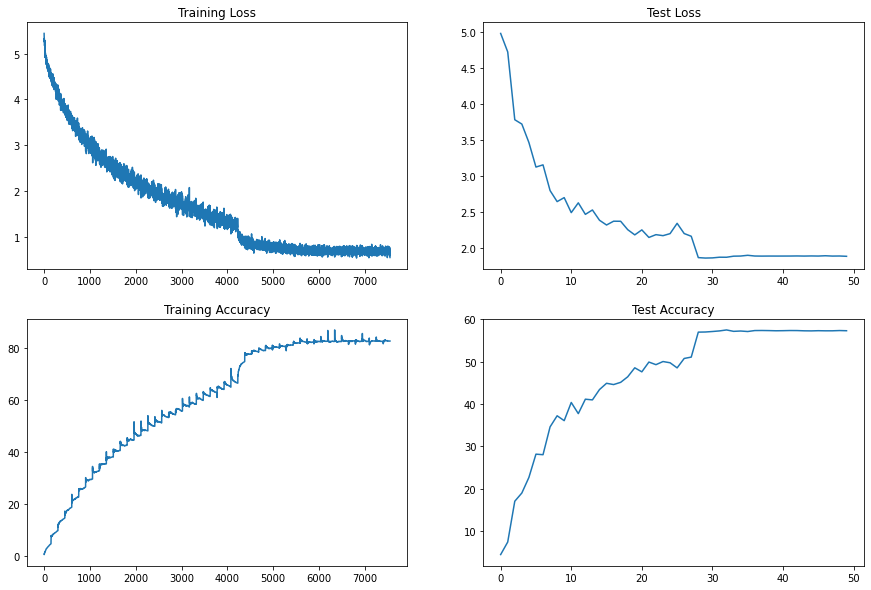

In [13]:
plot_logs(logs)